## 1. 완주하지 못한 선수
- 수많은 마라톤 선수들이 마라톤에 참여하였습니다. 단 한 명의 선수를 제외하고는 모든 선수가 마라톤을 완주하였습니다.

- 마라톤에 참여한 선수들의 이름이 담긴 배열 participant와 완주한 선수들의 이름이 담긴 배열 completion이 주어질 때, 완주하지 못한 선수의 이름을 return 하도록 solution 함수를 작성해주세요.

- 제한사항
    - 마라톤 경기에 참여한 선수의 수는 1명 이상 100,000명 이하입니다.
    - completion의 길이는 participant의 길이보다 1 작습니다.
    - 참가자의 이름은 1개 이상 20개 이하의 알파벳 소문자로 이루어져 있습니다.
    - 참가자 중에는 동명이인이 있을 수 있습니다.

- 포인트? 이름이 주어지면 몇 번이나 배열에 등장했는지, 이름에 대해 기록해야 함.(동명이인 주의)

자료구조(와 알고리즘)의 선택
- 만약 이름 대신 번호가 주어졌다면? - 선형 배열(linear array)
- 가능한 모든 이름의 조합의 수를 배열로 나타내려하면 26의 20승만큼의 배열 잡아야 함
- 번호 말고 다른 것(문자열)로 접근할 수 있는 좋은 자료구조는 없나?
- 배열은 인덱스를 통해 몇 번째 원소인지 바로 찾아갈 수 있는 구조가 주어지나, 인덱스 말고 문자열로 찾아갈 수 있는 해쉬가 있음!

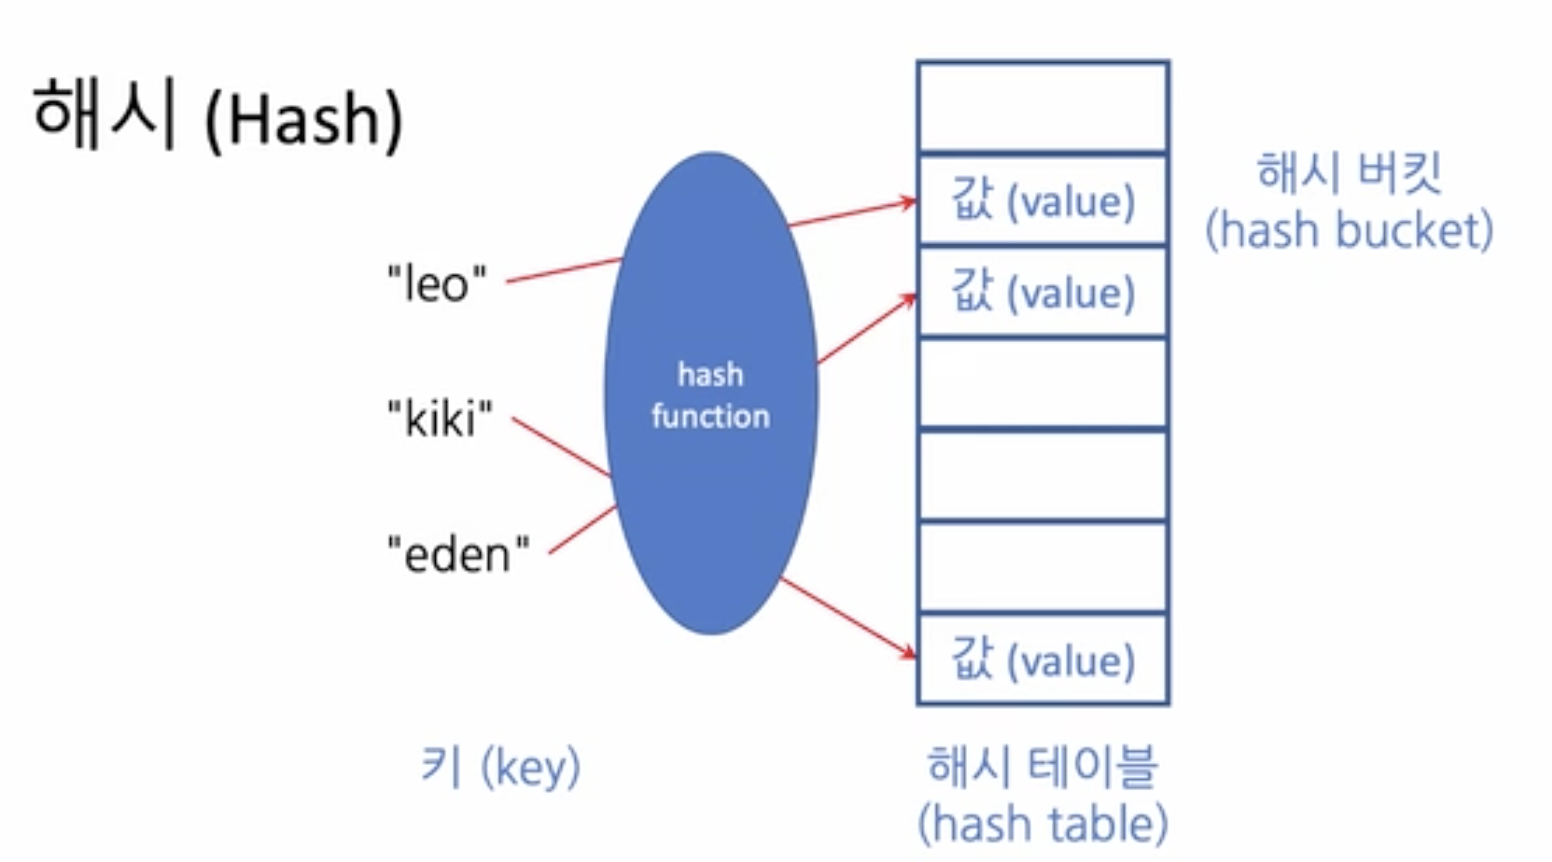

In [1]:
from IPython.display import Image
Image(filename='./image/hash.png') 

- 가급적이면 키가 모두 다른 칸(hash bucket) 으로 들어가도록 hash function으로 구성
- 만약 같은 칸에 사상되는 경우 = 해쉬 충돌
  -> 같은 칸에 값을 연달아 저장해서 어떤게 leo, eden인지 구분해놓으면 됨.

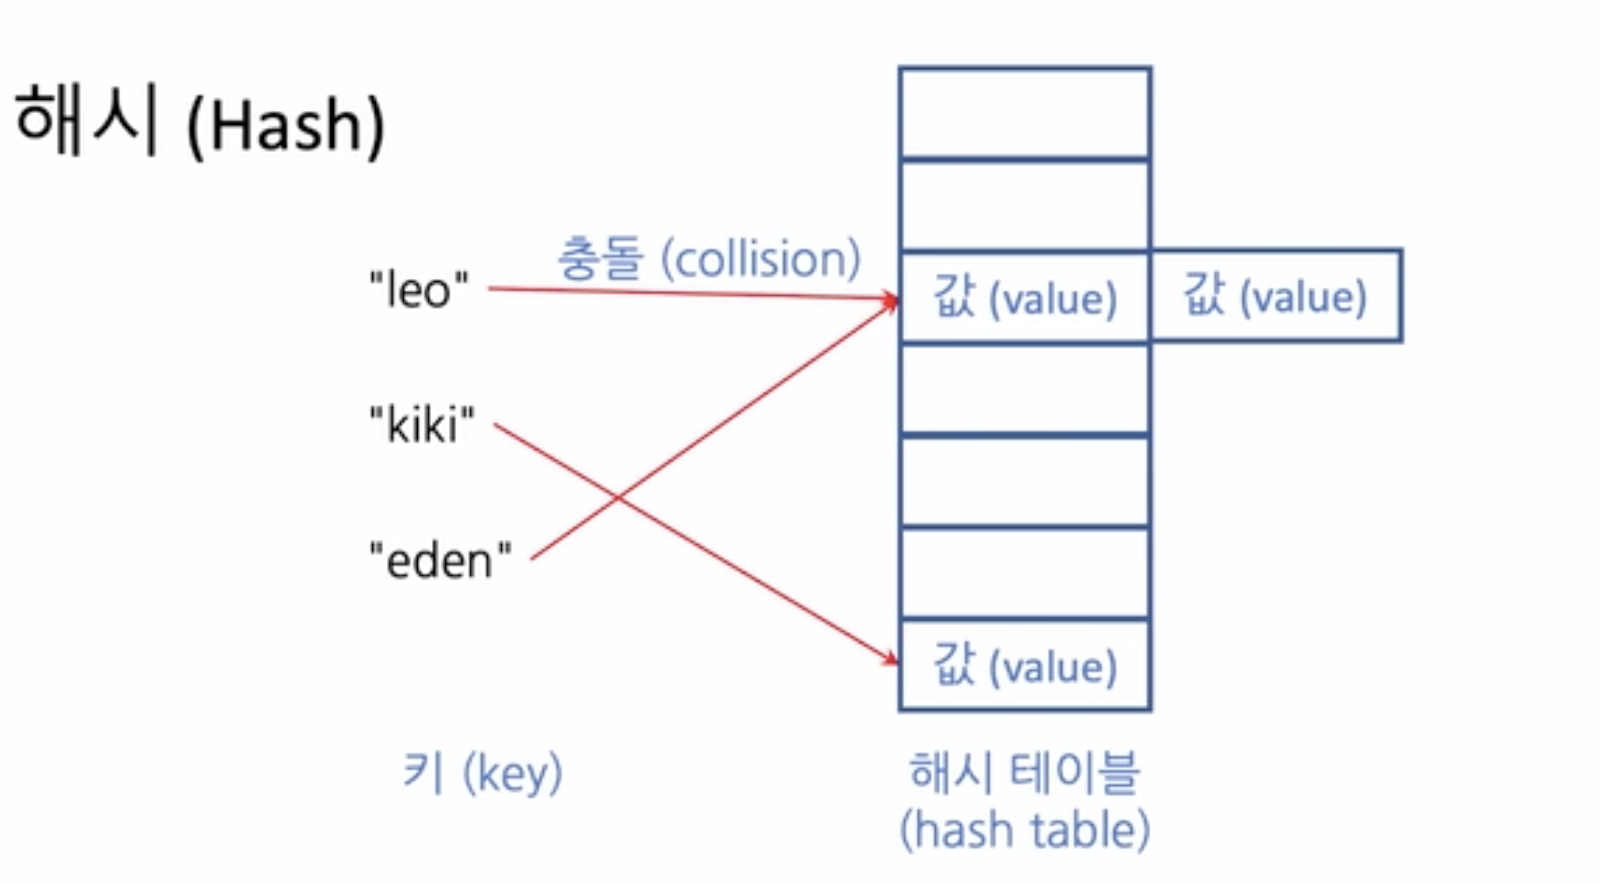

In [2]:
from IPython.display import Image
Image(filename='./image/해쉬충돌.png') 

- 각 이름을 가진 사람들이 몇명이나 마라톤에 참가했는지

#### 예제
- participant = ["mislav", "stanko", "mislav", "ana"]
 - "mislave" 2 , "stanko" 1, "ana" 1

- completion = ["stanko", "ana", "mislave"]
 - "stanko" 1->0으로 변경, "ana" 1->0, "mislave" 2->1
 - mislave라는 이름을 가진 선수 중 한 명만 완주하지 못함.
 
- 해쉬 테이블에 문자열로 이루어진 사람들의 이름과, 그 이름이 participant에 등장한 횟수를 해쉬 테이블에 기록하고 completion이라는 배열을 보면서 각 이름의 선수들 중 완주한 사람이 있으니 대응되는 값들을 조절해가면서 결과적으로 완주하지 못한 선수를 찾아가는 방식

## 풀이 (딕셔너리 활용)


In [4]:
def solution(participant, completion):
    d = {}
    
    for x in participant:
        d[x] = d.get(x, 0) + 1 #이름이 없으면 0, 그렇지 않으면 1더해서 value에 넣음
    for x in completion:
        d[x] -= 1 
        
    dnf = [k for k, v in d.items() if v > 0] #등장 횟수 >0인 이름 골라서 리스트에 저장
    answer = dnf[0]
    return answer

#### 딕셔너리 관련 함수

In [15]:
a = {'name': 'pey', 'phone': '0119993323', 'birth': '1118'}

In [16]:
a['name']

'pey'

In [6]:
# key 리스트 만들기(keys)
a.keys()

dict_keys(['name', 'phone', 'birth'])

In [7]:
list(a.keys())

['name', 'phone', 'birth']

In [8]:
#value 리스트 만들기(values)
a.values()

dict_values(['pey', '0119993323', '1118'])

In [9]:
# Key, Value 쌍 얻기(items)
a.items()

dict_items([('name', 'pey'), ('phone', '0119993323'), ('birth', '1118')])

In [11]:
#Key: Value 쌍 모두 지우기(clear)
a.clear()
a

{}

In [12]:
# Key로 Value얻기(get)
a = {'name':'pey', 'phone':'0119993323', 'birth': '1118'}
a.get('name')

'pey'

- 딕셔너리 안에 찾으려는 Key 값이 없을 경우 미리 정해 둔 디폴트 값을 대신 가져오게 하고 싶을 때에는 get(x, '디폴트 값')을 사용하면 편리하다.

In [13]:
a.get('foo', 'bar')

'bar'

In [14]:
#해당 Key가 딕셔너리 안에 있는지 조사하기(in)
a = {'name':'pey', 'phone':'0119993323', 'birth': '1118'}
'name' in a

True

### 다른 사람의 풀이

In [ ]:
# 정렬을 이용한다면 아래와 같이 할 수도 있음..but 해쉬 문제이므로 해쉬로 풀 것!!

def solution(participant, completion):
    participant.sort()
    completion.sort()
    
    for i in range(len(completion)):
        if participant[i] != completion[i]:
            return participant[i]
        
    return participant[len(participant) -1]

In [ ]:
import collections


def solution(participant, completion):
    answer = collections.Counter(participant)  - collections.Counter(completion)
    return list(answer.keys())[0]